# The state of AI Kaggle Report 2021

Just a month ago, a deep and comprehensive survey of the global trends in the field of Artificial Intelligence and Machine Learning was published, the [**State of AI Report 2021**](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_165). Though it might be biased by the authors' backgrounds, it clearly gives a thorough overview of state-of-the-art research and identifies the hot topics in the community. Some noteworthy issues are also revealed.

Here, the five most outstanding statements[<sup>1</sup>](#fn1) are picked and investigated for the Kaggle community.

Let's investigate the **state of AI at Kaggle in 2021**.

## 5 statements from "State of AI Report 2021" to be investigated for the Kaggle community

| Statement | Confirmed |
| :- | :-: |
| 1. China "rocketed" in 2021 with best quality research, largest hiring growth of ML talents in India and Brazil | Partly |
| 2. Massive lack of gender diversity in technical teams | Yes |
| 3. Transformers are the "general purpose architecture for ML" | Yes |
| 4. Lack of openness in the community | Yes |
| 5. Companies have entered deployment phase of AI | No |


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Load data
data_path = '/kaggle/input/kaggle-survey-2017/multipleChoiceResponses.csv'
df_17 = pd.read_csv(data_path, low_memory=False,encoding='ISO-8859-1', skiprows=[1])

data_path = '/kaggle/input/kaggle-survey-2018/multipleChoiceResponses.csv'
df_18 = pd.read_csv(data_path, low_memory=False,encoding='utf-8', skiprows=[1])

data_path = '/kaggle/input/kaggle-survey-2019csv/kaggle_survey_2019.csv'
df_19 = pd.read_csv(data_path, low_memory=False,encoding='utf-8', skiprows=[1])

data_path = '/kaggle/input/kaggle-survey-2020csv/kaggle_survey_2020.csv'
df_20 = pd.read_csv(data_path, low_memory=False,encoding='utf-8', skiprows=[1])

data_path = '/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv'
df_21 = pd.read_csv(data_path, low_memory=False,encoding='utf-8', skiprows=[1])

Before diving deep into the topic, let's get a better picture of the average Kaggle user:

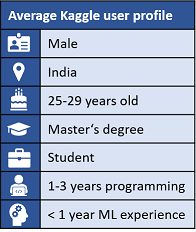

* The Top 5 countries of residence are India, United States of America, Japan, China and Brazil (see figure below).<br>
* As already noted in [last year's winner's notebook](https://www.kaggle.com/andresionek/one-chart-many-answers-kaggle-surveys-in-slopes), there is a huge gender gap in the Kaggle community and the situation has not changed this year with 80 % male users.<br>
* There is a peak in the age distribution at 25-29 years, which fits with the most common role of student (26 %), while still most of the users are holding a Bachelor's or Master's degree (77 %).
* More than 50 % fall into the category of early programmers with little or no experience in Machine Learning.

In [ ]:
# Get value counts per country and divide by number of all users, output in percent
# Q3: countries
counts = df_21['Q3'].value_counts().values / df_21.shape[0] * 100

# Create dataframe with country names and counts per country in percent
df_countries = pd.DataFrame({'Country': df_21['Q3'].value_counts().index,
                            'Counts': counts}).reset_index(drop=True)

# Get geopandas dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge Kaggle dataset with geopandas dataset
df_world = world.merge(df_countries, how="left", left_on=['name'], right_on=['Country'])

# Plot world map
p, ax = plt.subplots(1, figsize=(20,8))
ax.set_title('Worldwide Kaggle users in 2021',
             fontdict={'fontsize': 10})

p = df_world.plot(column='Counts',
                  cmap='YlOrRd',
                  legend=True,
                  ax = ax,
                  edgecolor="black",
                  norm=colors.LogNorm(vmin=df_world.Counts.min(), vmax=df_world.Counts.max()),
                  legend_kwds={'label': "% of all users",
                               'orientation': "vertical"},
                  missing_kwds={"color": "white",
                                "hatch":"."})

ax = p.figure.axes[0].tick_params(labelsize=10)
cb_ax = p.figure.axes[1].tick_params(labelsize=10)
xlabel = plt.xlabel('Longitude')
ylabel = plt.ylabel('Latitude')

With this picture of the Kaggle users in mind, let us investigate the five statements.

### 1. AI talent in international context

The authors of the [**State of AI Report 2021**](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_165) discovered that while in 1980 there was [no AI research contribution from China](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_352), **Chinese** institutions now make the [largest volume of quality AI research](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_2842).<br>
In addition, the hiring rate of AI talents in **India** and **Brazil** has increased by [a factor of three compared to 2017 exceeding now the hiring rate of Canada and the United States of America (US)](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_338).

Putting numbers to the world map above, we see that the mentioned countries also show in the top 5 countries of the Kaggle survey: **India** (28.6 %), US (10.2 %), Japan (3.5 %), **China** (3.1 %), **Brazil** (2.9 %).<br>
An inter-cohort analysis across the years 2017-2021 shows a trend of decreasing participation of users from the US and an immense increase of participation of users from India. For China and Brazil the numbers are too low in order to make a realiable statement.

In [ ]:
# Countries to be investigated separately
countries = ['US', 'India', 'Brazil', 'China', 'Other']

# Get number of users per country
def get_num_per_ctry(df, k, c_list):
    # Get all value counts per country
    cts = df[k].value_counts()
    # Keep only countries to be investigated and append others as last item of list
    num_per_ctry = list(cts.loc[c_list].values)
    num_per_ctry.append(len(df) - sum(num_per_ctry)) # 'Other'
    return num_per_ctry

# 2017
c_list = ['United States', 'India', 'Brazil', 'Republic of China'] # Naming varies in different years
part_17 = get_num_per_ctry(df_17, 'Country', c_list)

# 2018
c_list = ['United States of America', 'India', 'Brazil', 'China']
part_18 = get_num_per_ctry(df_18, 'Q3', c_list)

# 2019
c_list = ['United States of America', 'India', 'Brazil', 'China']
part_19 = get_num_per_ctry(df_19, 'Q3', c_list)

# 2020
c_list = ['United States of America', 'India', 'Brazil', 'China']
part_20 = get_num_per_ctry(df_20, 'Q3', c_list)

# 2021
c_list = ['United States of America', 'India', 'Brazil', 'China']
part_21 = get_num_per_ctry(df_21, 'Q3', c_list)

# Store result in dataframe
df_c = pd.DataFrame({'2017': part_17,
                     '2018': part_18,
                     '2019': part_19,
                     '2020': part_20,
                     '2021': part_21},index=countries)

# Plot number of Kaggle users per country vs. year
fig = plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

markers = ['o', 's', 'd', 'p', 'v']
for m,c in zip(markers,countries):
    sns.lineplot(data=df_c.loc[c],markers=True, marker=m, markersize=10)
plt.legend(countries)
plt.title('Number of Kaggle users who answered the survey split by countries and year of survey')
plt.ylabel('# Kaggle users per country')
xlabel = plt.xlabel('Year')

At first glance, this is alignment with the statements in the [**State of AI Report 2021**](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_165). An intra-cohort analysis for the years 2019 and 2021 allows a few more intricate insights. We do this by looking into the time users have **applied Machine Learning methods**.

In [ ]:
# Countries to be investigated
countries = ['United States of America', 'India', 'Brazil', 'China']


def ml_exper(df, q_ctry, q_ml):
    '''Create dataframe with ML experience split by country'''
    df_exper_ratio = pd.DataFrame()   # dataframe with ML experience

    # Iterate through countries and update dataframe with information for each country
    for country in countries:
        # Filter entire dataframe by country to be investigated and get value counts for ML experience
        df_sub = df[df[q_ctry]==country][q_ml].value_counts()
        # Number of answers per country for normalization
        total = (df[q_ctry]==country).sum()
        # Update dataframe with clustered ML experience
        df_exper_ratio = cluster_years_experience(df_sub, total, df_exper_ratio, country)

    # Create entry for 'Other' countries
    df_sub = df[(df[q_ctry]!=countries[0]) & (df[q_ctry]!=countries[1]) & (df[q_ctry]!=countries[2]) & (df[q_ctry]!=countries[3])][q_ml].value_counts()
    total = ((df[q_ctry]!=countries[0]) & (df[q_ctry]!=countries[1]) & (df[q_ctry]!=countries[2]) & (df[q_ctry]!=countries[3])).sum()
    df_exper_ratio = cluster_years_experience(df_sub, total, df_exper_ratio, 'Other')

    # Change format for plotting
    df_exper_ratio = pd.melt(df_exper_ratio, id_vars="Country", var_name="Experience", value_name="% per Country")
    return df_exper_ratio


def cluster_years_experience(df_sub, total, df_exper_ratio, country):
    '''Cluster years of experience'''
    new_dict = dict()
    
    new_dict['Country'] = country.replace('United States of America', 'US')
    try:
        new_dict['< 2 y'] = df_sub['< 1 years'] + df_sub['1-2 years'] # 2019
    except:
        new_dict['< 2 y'] = df_sub['Under 1 year'] + df_sub['1-2 years'] # 2021
    new_dict['2-5 y'] = df_sub['2-3 years'] + df_sub['3-4 years'] + df_sub['4-5 years']
    new_dict['> 5 y'] = df_sub['5-10 years'] 
    try:
        new_dict['> 5 y'] += df_sub['10-15 years'] # 2019
    except:
        pass
    try:
        new_dict['> 5 y'] += df_sub['20+ years'] # 2019
    except:
        pass
    try:
        new_dict['> 5 y'] += df_sub['10-20 years'] + df_sub['20 or more years'] # 2021
    except:
        pass
    new_dict['No use'] = total - df_sub.sum()   
    try:
        new_dict['No use'] += df_sub['I do not use machine learning methods'] # 2021
    except:
        pass

    df_exper_ratio = df_exper_ratio.append({'Country': new_dict['Country'],
                                          '< 2 y': new_dict['< 2 y'] / total * 100,
                                          '2-5 y': new_dict['2-5 y'] / total * 100,
                                          '> 5 y': new_dict['> 5 y'] / total * 100,
                                          'No use': new_dict['No use'] / total * 100}, ignore_index=True)    
    return df_exper_ratio


# Get data

# 2019
# Q3: Country of residence
# Q23: ML experience
df_exper_ratio_19 = ml_exper(df_19, 'Q3', 'Q23')

# 2021
# Q3: Country of residence
# Q15: ML experience
df_exper_ratio_21 = ml_exper(df_21, 'Q3', 'Q15')

# Bar plot with ratio per country

# 2019
sns.set_style('whitegrid')
p = sns.catplot(x='Country', y='% per Country', hue='Experience', data=df_exper_ratio_19, kind='bar', height=5, aspect=1.7, palette="Blues_d")
p.set_xticklabels(rotation=30)
plt.ylim([0,65])
t = plt.title('Years of ML experience (2019)')

# 2021
p = sns.catplot(x='Country', y='% per Country', hue='Experience', data=df_exper_ratio_21, kind='bar', height=5, aspect=1.7, palette="Blues_d")
p.set_xticklabels(rotation=30)
plt.ylim([0,65])
t = plt.title('Years of ML experience (2021)')

We can conclude the following observations:<br>
* In 2021, the fraction of users who do not use ML methods is almost the same in any country (roughly 20-25 %).
* In 2019, the fraction of users who do not use ML methods was varying with values > 30 %.
* The US cohort has the highest fraction of senior ML users (experience > 5 y).
* Many junior ML enthusiasts have left the field before becoming senior.

### 2. Massive lack of gender diversity in technical teams
The [**State of AI Report 2021**](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_165) found a ["massive lack of gender diversity in technical teams"](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_524) with a ratio of 3:1 (# Men : # Women), while the ratio of non-technical teams is balanced.<br>
(NB: The definition of a "technical team" was taken from the [Center for Security and Emerging Technologies (CSET)](http://cset.georgetown.edu/), considering people who would require only limited additional training to work with AI products.)

According to the definition of technical, the majority of Kaggle users falls into this category.<br>
How is the distribution of gender across the different job areas and industries?

In [ ]:
def gender_per_branch(df, q_gender, q_branch):
    '''Create dataframe with gender per branch'''
    branches = df[q_branch].unique()
    
    df_gen_div = pd.DataFrame()

    # Filter by branch and get genders
    for branch in branches:
        df_sub = df[df[q_branch]==branch][q_gender].value_counts()
        total = (df[q_branch]==branch).sum()

        new_dict = dict()
        new_dict['Branch'] = branch

        for gender in df_sub.index.values:
            new_dict[gender] = df_sub[gender]        
        df_gen_div = df_gen_div.append(new_dict, ignore_index=True)

    df_gen_div.fillna(0,inplace=True)
    df_gen_div['Other'] = df_gen_div['Prefer not to say'] + df_gen_div['Prefer to self-describe'] + df_gen_div['Nonbinary']
    df_gen_div.pop('Prefer not to say')
    df_gen_div.pop('Prefer to self-describe')
    df_gen_div.pop('Nonbinary')
    df_gen_div['Total'] = df_gen_div['Man'] + df_gen_div['Woman'] + df_gen_div['Other']

    df_gen_div = df_gen_div.sort_values('Total',ascending=False).set_index('Branch')
    
    return df_gen_div


# 2021
# Q2: Gender
# Q5: Job area

# Get data
df_sorted = gender_per_branch(df_21, 'Q2', 'Q5')

# Choose only max_num of job areas to be plotted
max_num = 6
for r_num in range(max_num+1,len(df_sorted)):
    df_sorted.iloc[max_num] += df_sorted.iloc[r_num]
df_sorted.loc['Other'] += df_sorted.iloc[max_num]
df_sorted = df_sorted[:max_num]
df_sorted.sort_values('Total', ascending=False, inplace=True)

# Sort by total value -> inner circle
l_in = df_sorted['Total'].values
# Outer circle
l_out = []
for i in range(len(df_sorted)):
    l_out.append(df_sorted.iloc[i]['Man'])
    l_out.append(df_sorted.iloc[i]['Woman'])
    l_out.append(df_sorted.iloc[i]['Other'])

# Plot
fig, ax = plt.subplots(figsize=(9,6))
ax.axis('equal')
width = 0.3

# Outer donut
cm = plt.cm.tab20c
cout = cm(np.array([17,18,19,9,10,11,1,2,3,13,14,15,6,7,7,21,22,23]))
labels = ['Men', 'Women', '']*6
pie, _ = ax.pie(l_out, radius=1-width/1.24, labels=labels, labeldistance=1.02, colors=cout)
plt.setp(pie, width=width, edgecolor='white')

# Inner donut
cin = cm(np.array([16,8,0,12,5,20]))
labels=list(df_sorted.index)
labels[1] = 'Student'
labels[2] = 'Data\nScientist'
labels[3] = 'Software\nEngineer'
labels[4] = 'Data\nAnalyst'
labels[5] = 'Curr. not\nemployed'
pie2, _ = ax.pie(l_in, radius=1-width, labels=labels, labeldistance=0.66, colors=cin)
plt.setp( pie2, width=width, edgecolor='white')
plt.title('Gender distribution across job areas')
plt.show()

Also among the Kaggle users there is a massive gap between the number of participating men and women. In every area and industry the ratio of 3:1, which was observed in the [**State of AI Report 2021**](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_165), is exceeded. The maximum gap is found for **program managers (8:1)** and **Machine Learning Engineers (7:1)**, while the ratio of 3:1 is only observed for students and currently unemployed users.<br>
(NB: In the figure above, the label for other gender than "Man" or "Woman" is not displayed because of visibility reasons.)

The industry in which Kaggle users are working reveals a dominance of male workers in the fields of **Military/Security/Defense**, **Broadcasting/Communications** and **Manufacturing/Fabrication**. These are all industry areas which were traditionally considered as male domains and it seems that not much has changed.

In [ ]:
# Fraction man to woman
def get_ratio(df, q_field):
    fields = df[q_field].dropna().unique()
    genders = df['Q2'].dropna().unique()
    
    df_ratio = pd.DataFrame()
    
    for f in fields:
        df_sub = df[df[q_field]==f]['Q2'].value_counts()    
        new_dict = dict()
        new_dict['Field'] = f    
        new_dict['# Men / # Women'] = df_sub['Man'] / df_sub['Woman']        
        df_ratio = df_ratio.append(new_dict, ignore_index=True)
        
    df_ratio.fillna(0,inplace=True)
    
    return df_ratio.sort_values('# Men / # Women', ascending=False)

# Get genders per job area and industry
# 2021
# Q5: job area
# Q20: industry
df_jobs = get_ratio(df_21, 'Q5')
df_jobs.rename(columns = {'Field':'Job area'}, inplace = True)
df_industries = get_ratio(df_21, 'Q20')
df_industries.rename(columns = {'Field':'Industry'}, inplace = True)

# Plot
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,2, figsize=(20,6))
# First plot
p1 = sns.barplot(x='Job area', y='# Men / # Women', data=df_jobs, orient='v', ax=axes[0], palette="Blues_d")

# Second plot
p2 = sns.barplot(x='Industry', y='# Men / # Women', data=df_industries, orient='v', ax=axes[1], palette="Blues_d")
fig.autofmt_xdate()
plt.tight_layout()

### 3. Dominating ML tools
In the [**State of AI Report 2021**](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_165) it is claimed that the **Transformer model** is now the ["general purpose architecture"](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_260) for Machine Learning. Originally coming from Natural Language Processing, it has proven its strength in almost any other field of research.<br>
Suprisingly, the authors have noted a comeback of Multi Layer Perceptrons (MLP) and Convolutional Neural Networks (CNNs), which they found performing [competitively well with transformers](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf0e68b4f35_0_66). The secret is that such models have to be trained and fine-tuned properly.

Further noteworthy observations are that in comparison with the previous year, [no major progression was found in 3D computer vision](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_277). Graph Neural Networks (GNNs) are mentioned as one of the ["hottest field of research"](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gebb7f5a4fd_3_659). Two statements which cannot be investigated from this survey unfortunately.

However, we can investigate the use of MLP, CNN and Transformer architectures. For completeness, we also investigated the use of recurrent architectures (RNN).

In [ ]:
def get_multiple_choice_df(q, num_answers):
    
    part = 'Part_'
    oth = 'OTHER'
    q_list = [q+part+str(i) for i in range(1, num_answers+1)]
    q_list.append(q+oth)
    
    df_q = df[q_list]
    df_q.fillna(0, inplace=True)
    
    new_col_names = []
    for col in df_q.columns:
        entries = df_q[col].unique()
        
        if len(entries) < 3:
            new_name = [e for e in entries if e!=0][0]
            new_col_names.append(new_name)
            df_q[new_name] = [1 if type(v)==str else 0 for (k,v) in df_q[col].items()]
            df_q.drop([col], axis=1, inplace=True)
        else:
            print(f'More than 2 unique values in column {col}.')
            
    return df_q


# Get ML methods split by year
df_ml_methods = pd.DataFrame(columns=['Method', 2019, 2020, 2021], index=[0, 1, 2, 3])

df_ml_methods['Method'] = ['MLP', 'CNN', 'RNN', 'Transformer']


df_ml_methods[2019] = [len(df_19['Q24_Part_6'].dropna()) / len(df_19['Q24_Part_6']) * 100,
                       len(df_19['Q24_Part_7'].dropna()) / len(df_19['Q24_Part_7']) * 100,
                       len(df_19['Q24_Part_9'].dropna()) / len(df_19['Q24_Part_9']) * 100,
                       len(df_19['Q24_Part_10'].dropna()) / len(df_19['Q24_Part_10']) * 100]

df_ml_methods[2020] = [len(df_20['Q17_Part_6'].dropna()) / len(df_20['Q17_Part_6']) * 100,
                       len(df_20['Q17_Part_7'].dropna()) / len(df_20['Q17_Part_7']) * 100,
                       len(df_20['Q17_Part_9'].dropna()) / len(df_20['Q17_Part_9']) * 100,
                       len(df_20['Q17_Part_10'].dropna()) / len(df_20['Q17_Part_10']) * 100]

df_ml_methods[2021] = [len(df_21['Q17_Part_6'].dropna()) / len(df_21['Q17_Part_6']) * 100,
                       len(df_21['Q17_Part_7'].dropna()) / len(df_21['Q17_Part_7']) * 100,
                       len(df_21['Q17_Part_9'].dropna()) / len(df_21['Q17_Part_9']) * 100,
                       len(df_21['Q17_Part_10'].dropna()) / len(df_21['Q17_Part_10']) * 100]

df_ml_methods = pd.melt(df_ml_methods, id_vars="Method", var_name="Year", value_name="%")


# Plot
sns.set_style('whitegrid')
p = sns.catplot(x='Method', y='%', hue='Year', data=df_ml_methods, kind='bar', height=5, aspect=1.2, palette="Blues_d")
p.set_xticklabels(rotation=30)
t = plt.title('ML tools')

Also in the Kaggle community, the use of Transformers has almost doubled since 2019. The trend from the [**State of AI Report 2021**](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_165) can therefore be confirmed.<br>
However, a comeback of MLP or CNN architectures is not taking place in the Kaggle community.

### 4. Lack of openness
The [**State of AI Report 2021**](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_165) drew attention once more to the hesitation of researchers to make their code available to the entire community. They found that only [26 %](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gebb7f5a4fd_3_545) of AI research papers provided access to the related code. Among the papers with highest impact factors, the fraction is even lower with just [17 %](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gebb7f5a4fd_3_545).<br>
When comparing the numbers to the year 2020 this is still a good achievement since last year only 15 % of the code was published.

Interestingly, the authors found that publishing your work on **Twitter** increases the citation rate by [a factor of 3](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gebb7f5a4fd_3_631)!

Let's see if this trend is followed in the Kaggle community.

In [ ]:
def get_publish(df, q, num_answers):
    
    part = 'Part_'
    oth = 'OTHER'
    q_list = [q+part+str(i) for i in range(1, num_answers+1)]
    q_list.append(q+oth)
    
    # Select only columns related to this question
    df_q = df[q_list]
    
    # Users who do not share at all
    no_share_at_all = (1 - len(df_q.dropna(how='all')) / len(df_q)) * 100   
    
    # Check if format is correct and replace string by integers
    new_col_names = []
    df_q.fillna(0, inplace=True)
    for col in df_q.columns:
        entries = df_q[col].unique()
        
        if len(entries) < 3:
            new_name = [e for e in entries if e!=0][0]
            new_col_names.append(new_name)
            df_q[new_name] = [1 if type(v)==str else 0 for (k,v) in df_q[col].items()]
            df_q.drop([col], axis=1, inplace=True)
        else:
            print(f'More than 2 unique values in column {col}.')            
    
    # Count answers per column      
    df_cts = df_q.sum()/len(df_q) * 100
    lbls = [idx.strip() for idx in df_cts.index]
    df_cts.index = lbls
    
    # 2021 format is different: Add to users who do not share at all
    try:
        no_share_at_all += df_cts['I do not share my work publicly'].sum()
        df_cts.pop('I do not share my work publicly')
    except:
        pass
            
    df_cts['No share'] = no_share_at_all
                
    return df_cts

# 2020
q = 'Q36_'
num_answers = 8
df_mc_20 = get_publish(df_20, q, num_answers)
df_mc_20 = df_mc_20.sort_index()

# 2021
q = 'Q39_'
num_answers = 9
df_mc_21 = get_publish(df_21, q, num_answers)
df_mc_21 = df_mc_21.sort_index()

df_publish = pd.DataFrame(columns=['Medium', 2020, 2021])
df_publish['Medium'] = df_mc_21.index
df_publish[2020] = df_mc_20.values
df_publish[2021] = df_mc_21.values
df_publish = df_publish.sort_values(2021, ascending=False)
df_publish = pd.melt(df_publish, id_vars="Medium", var_name="Year", value_name="% of all users")

# Plot
sns.set_style('whitegrid')
p = sns.catplot(x='Medium', y='% of all users', hue='Year', data=df_publish, kind='bar', height=5, aspect=2, palette="Blues_d")
p.set_xticklabels(rotation=30)
t = plt.title('Where application is shared')

The picture in 2021 looks very much the same as in the [**State of AI Report 2021**](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_165): Only 23.3 % of the Kaggle users publish their work.<br>
A miniscule trend of enhanced sharing can be observed when comparing the numbers to the previous year. Especially the sharing on Kaggle and GitHub has increased. Good work, folks!

Since Twitter is not mentioned explicitely, we cannot make conclusions in this apect.

### 5. AI in companies

The last highlighted but clearly not least important point is about AI usage in companies. The [**State of AI Report 2021**](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_165) claims a ["de-democratisation of AI research"](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_409), meaning that faculties receive funding from big tech companies. They found that [88 % of the best AI research departments in the US receive funding from such companies](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_496). This brings us back to the 4th point "Lack of openness" which highlights the importance of making code available to the entire community.

Interestingly it was observed, that especially the best researchers -- those from elite universities with highest impact papers -- are often [transitioning to industry](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_422).

Since the Kaggle survey data does not provide insight into all these aspects, we focus on the following observations:<br>
* [Companies are investing more in AI](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_3261)
* There is an attitude towards ["AI-first products"](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_3333)
* The industry focus has [transitioned towards model deployment and focus on model performance in production](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_260)

The Kaggle survey question "Does your current employer incorporate machine learning methods into their business?" gives best insight into this topic. For better readability, we have shortened the following answer choices as such:

| Short answer | Original answer |
| :- | :- |
| 1. Well established | We have well established ML methods (i.e., models in production for more than 2 years) |
| 2. Recently started | We recently started using ML methods (i.e., models in production for less than 2 years) |
| 3. Generating insights | We use ML methods for generating insights (but do not put working models into production) |
| 4. Exploring | We are exploring ML methods (and may one day put a model into production) |
| 5. No use | No (we do not use ML methods) |
| 6. Not known | I do not know |


In [ ]:
def level_of_ml(df_20, df_21):
    s1 = df_21['Q23'].value_counts() / (len(df_21)-df_21['Q23'].isnull().sum()) * 100
    s2 = df_20['Q22'].value_counts() / (len(df_20)-df_20['Q22'].isnull().sum()) * 100

    df_ML_at_work = pd.concat([s2, s1], axis=1)
    df_ML_at_work['ML methods in production'] = ['4. Exploring', '5. No use', '6. Not known', '1. Well established', '2. Recently started', '3. Generating insights']
    df_ML_at_work.reset_index(drop=True, inplace=True)
    df_ML_at_work.rename(columns={'Q22': 2020, 'Q23': 2021}, inplace=True)
    df_ML_at_work = df_ML_at_work.sort_values('ML methods in production', ascending=True)
    
    # print(df_ML_at_work)
    
    df_ML_at_work = pd.melt(df_ML_at_work, id_vars='ML methods in production', var_name="Year", value_name="Perc")
    
    # Plot
    sns.set_style('whitegrid')
    sns.barplot(data=df_ML_at_work, x='Perc', y='ML methods in production', hue='Year', palette="Blues_d")
    plt.xlabel('% of answers')
    plt.ylabel('ML level at work')
    plt.xlim([0,30])
    

df_ML_at_work = level_of_ml(df_20, df_21)
t = plt.title('Level of ML methods used at work')

According to the answers given in this Kaggle survey, 31 % of the companies are deploying their models into production already. Surprisingly, no major increase to last year can be observed (30 % of companies put models in production in 2020).
The dominating answer is the same as last year, "We are exploring ML methods (and may one day put a model into production)". <br>
There can be several reasons for this result:
* The subset of worldwide employees that were questioned in this survey does not represent well the entire set of employees.
* The employees who were questioned in this survey are not well informed about the tools developed in the companies they work.
* The answer options were not well understood. / The question was not answered correctly.
* The finding in the [**State of AI Report 2021**](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_165) applies mainly for US companies where AI research is most mature.

For this purpose, we explore the hypothesis that the American cohort better reflects the findings of the [**State of AI Report 2021**](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_165). By selecting only residents in the US, we get the following picture:

In [ ]:
df_21_US = df_21[df_21['Q3']=='United States of America']
df_20_US = df_20[df_20['Q3']=='United States of America']

level_of_ml(df_20_US, df_21_US)
t = plt.title('Level of ML methods used at work in the US')

Now the situation looks even worse. In 2021, only 24 % of the Kaggle users answered that their company is putting ML models in production, much less than in 2020 where the fraction was still 28 %. Answer 4 clearly dominates with 29 % this year.

The reason for this result cannot be answered finally. If the observed trend is actually true, and companies are going back from putting their ML applications in production towards exploring the use of such products, it is necessary to identify the root cause for this trend. It could be related to safety and security issues as well as maintenance considerations.

If the given answers are not reflecting well the situation of model deployment in companies, and assuming that Kagglers answered to the best of their knowledge, having no bad intentions, it might be that the answers were formulated too broadly. If people are working in big companies, they might not be well informed about the status of their products, especially if they themselves are not that familiar with ML products yet.

## Conclusion

Let's conclude by revising the statements of the [**State of AI Report 2021**](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_165) and checking the alignment with the Kaggle survey results:

| Statement | Confirmed |
| :- | :-: |
| 1. China "rocketed" in 2021 with best quality research, largest hiring growth of ML talents in India and Brazil | Partly |
| 2. Massive lack of gender diversity in technical teams | Yes |
| 3. Transformers are the "general purpose architecture for ML" | Yes |
| 4. Lack of openness in the community | Yes |
| 5. Companies have entered deployment phase of AI | No |

1. The number of users with experience in ML methods has increased internationally, while the most experienced users are still in the US. A strong boost of users from India was observed. The total number of users from China is too low in order to make reliable statements. However, a judgement about quality of research is not possible with the given data.
2. The largest gender gap among the Kaggle users is observed in the job role "Program managers" and for people working in the Military/Security/Defense industry. A clear confirmation of the statement in the [**State of AI Report 2021**](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_165).
3. Almost twice as many users apply Transformer models in comparison to 2019. Another clear confirmation of the statement in the [**State of AI Report 2021**](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_165).
4. Kaggle users publish only 23 % of the work. This is in good alignment with the observations in the [**State of AI Report 2021**](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_165).
5. A clear no. The result of this survey is contradicting with the statements in the [**State of AI Report 2021**](https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_165). The situation has not changed much, with a small tendency towards companies deploying less their ML models in production.

Relevant aspects that could not be enlightened with the survey data are:
* the usage of Graph Neural Networks (GNN) and GNN being one of the hottest topics in ML research
* AI safety and alignment
* Sustainability issues

It would be interesting to investigate these aspect in the coming year 2022.

## Literature and data sources
<ul>
    <li> [BH21] Nathan Benaich and Ian Hogarth, 2021. "State of AI Report 2021", https://docs.google.com/presentation/d/1bwJDRC777rAf00Drthi9yT2c9b0MabWO5ZlksfvFzx8/edit#slide=id.gf171287819_0_165  </li>
    <li> [KS17] 2017 Kaggle Machine Learning & Data Science Survey", https://www.kaggle.com/kaggle/kaggle-survey-2017 </li>
    <li> [KS18] 2018 Kaggle Machine Learning & Data Science Survey", https://www.kaggle.com/kaggle/kaggle-survey-2018 </li>
    <li> [KS19] 2019 Kaggle Machine Learning & Data Science Survey", https://www.kaggle.com/c/kaggle-survey-2019/data </li>
    <li> [KS20] 2020 Kaggle Machine Learning & Data Science Survey", https://www.kaggle.com/c/kaggle-survey-2020/data </li>
    <li> [KS21] 2021 Kaggle Machine Learning & Data Science Survey", https://www.kaggle.com/c/kaggle-survey-2021/data </li>
</ul>

<span id="fn1"><sup>1</sup>based on our judgement</span>